## Scale

### 데이터 준비 


In [3]:
import numpy as np 
from sklearn.model_selection import train_test_split


In [4]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]




In [5]:
 
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
#데이터 합치기 
length=bream_length+smelt_length
weight=bream_weight+smelt_length

In [7]:
fish_data=np.column_stack((length,weight))

In [8]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [9]:
## 쓰는 이유 시험에 출제 !!! stratify => 데이터를 클래스로 분할 후 무작위로 학습,검증 데이터 셋셋으로 나누어지는 방법
train_input, test_input, train_target, test_target=train_test_split(fish_data,
                                                       fish_target,
                                                       stratify=fish_target,
                                                       random_state=42)

### 모델링 

In [10]:
from sklearn.neighbors import KNeighborsClassifier


In [11]:
# 클래스 객체 생성
knn=KNeighborsClassifier()

In [12]:
knn.fit(train_input,train_target)

KNeighborsClassifier()

In [13]:
knn.score(test_input,test_target)

1.0

### 검증(Validation)

In [14]:
a_fish=[25,150]  #도미 

In [15]:
knn.predict([a_fish])

array([0.])

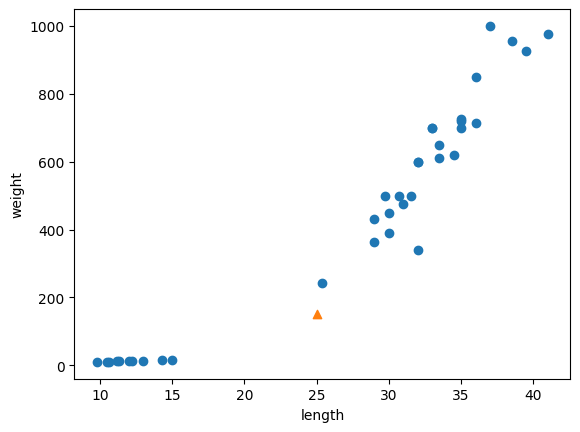

In [16]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1]) ## x 값 , y값
plt.scatter(25,150,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [17]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,   11.3],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,   11.2],
       [  34.5,  620. ],
       [  12. ,   12. ],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   14.3],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    9.8],
       [  32. ,  600. ],
       [  10.5,   10.5],
       [  33.5,  610. ],
       [  10.6,   10.6],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   13. ],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   15. ],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [18]:
train_input[:,0] ## 0번 열에 해당되는것만 포함

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

In [19]:
train_input[:,1] ## 1번 열에 해당되는것만 포함

array([ 500. ,   12.2,  700. ,   11.3,  925. ,  430. ,  714. ,  850. ,
        475. ,  720. , 1000. ,   11.2,  620. ,   12. ,  363. ,  700. ,
        500. ,  955. ,  650. ,   14.3,  500. ,  242. ,    9.8,  600. ,
         10.5,  610. ,   10.6,  700. ,  600. ,  725. ,   13. ,  450. ,
        340. ,   15. ,  390. ,  975. ])

In [20]:
train_input[2:10,1] ## 2행~9행 2번째 열의 데이터

array([700. ,  11.3, 925. , 430. , 714. , 850. , 475. , 720. ])

In [21]:
distance,index= knn.kneighbors([a_fish])

In [22]:
distance ## 

array([[ 92.00086956, 135.36986371, 136.121196  , 137.52454326,
        138.39320793]])

In [23]:
index

array([[21, 33, 19, 30,  1]])

In [24]:
train_input[index,0]

array([[25.4, 15. , 14.3, 13. , 12.2]])

In [25]:
train_input[index,1]

array([[242. ,  15. ,  14.3,  13. ,  12.2]])

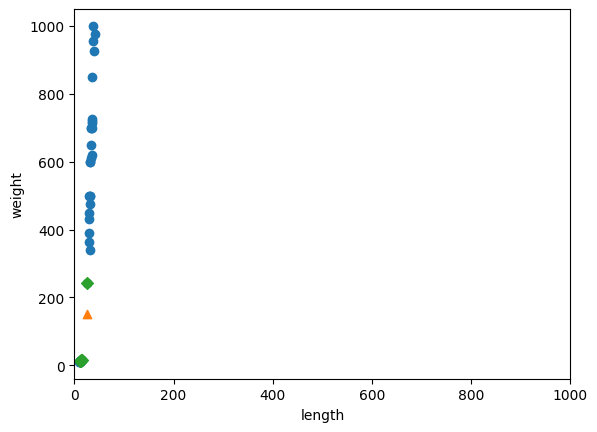

In [26]:


plt.scatter(train_input[:,0],train_input[:,1]) ## x 값 , y값
plt.scatter(25,150,marker="^")
plt.scatter(train_input[index,0],train_input[index,1],marker="D")
plt.xlim(0,1000)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [27]:
mean=np.mean(train_input,axis=0) ## axis colum 단위로 평균을낸다
std= np.std(train_input, axis=0)

print(mean)
print(std)

[ 27.29722222 454.275     ]
[  9.98244253 323.04751919]


In [28]:
train_scaled=(train_input-mean)/std

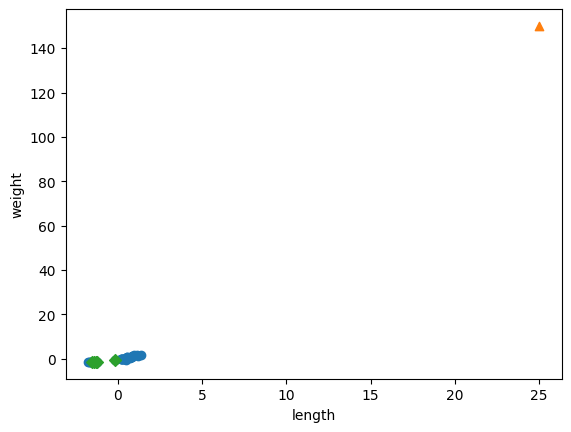

In [29]:


plt.scatter(train_scaled[:,0],train_scaled[:,1]) ## x 값 , y값
plt.scatter(25,150,marker="^")
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [30]:
new=([25,150]-mean)/std

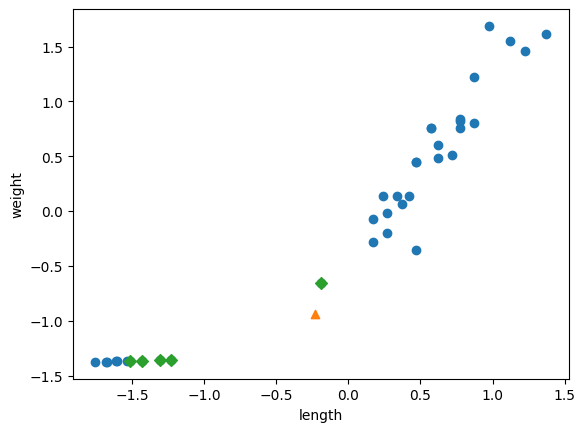

In [31]:


plt.scatter(train_scaled[:,0],train_scaled[:,1]) ## x 값 , y값
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[index,0],train_scaled[index,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [32]:
test_scaled=(test_input-mean)/std

In [33]:
from sklearn.neighbors import KNeighborsClassifier



In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [36]:
knn.score(test_scaled,test_target)

1.0

In [37]:
a_fish=[25,150]

In [38]:
new=(a_fish-mean)/std

In [39]:
new

array([-0.23012627, -0.94188929])

In [40]:
knn.predict([new])

array([1.])

In [41]:
distances,indexes=knn.kneighbors([new])

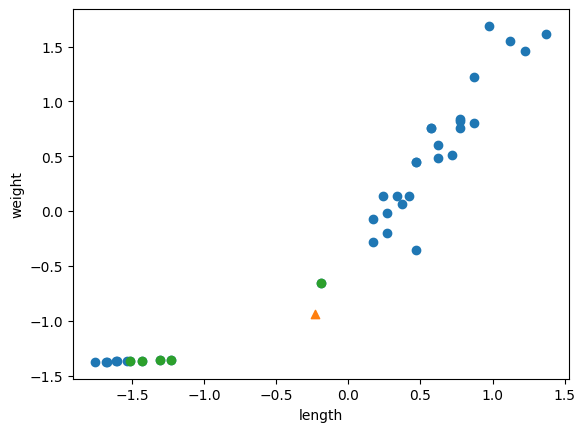

In [73]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
distance,indexes= knn.kneighbors([new])

In [44]:
distance

array([[0.28759301, 0.77155694, 0.89600077, 0.91522901, 0.95488804]])

In [45]:
indexes

array([[21, 14, 34, 32,  5]])

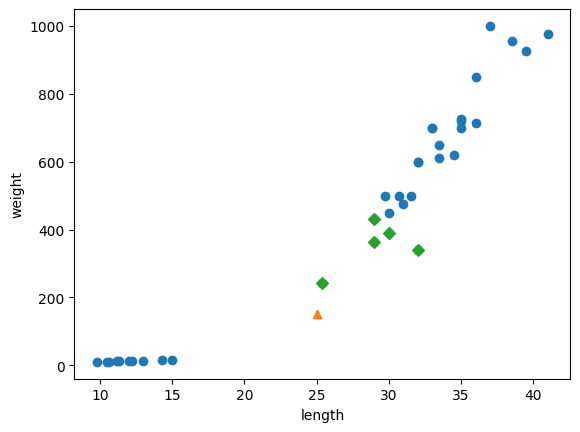

In [46]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [47]:
train_target[indexes]

array([[1., 1., 1., 1., 1.]])

## 3차 모델링 - 정규화

In [48]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,   11.3],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,   11.2],
       [  34.5,  620. ],
       [  12. ,   12. ],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   14.3],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    9.8],
       [  32. ,  600. ],
       [  10.5,   10.5],
       [  33.5,  610. ],
       [  10.6,   10.6],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   13. ],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   15. ],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [49]:
max=np.max(train_input,axis=0)
max

array([  41., 1000.])

In [50]:
min=np.min(train_input,axis=0)
min

array([9.8, 9.8])

In [51]:
train_normalized=(train_input-min)/(max-min)
##train_normalized

In [52]:
test_normalized=(test_input-min)/(max-min)
test_normalized[:3]

array([[0.03846154, 0.00121188],
       [0.06410256, 0.00201979],
       [0.63782051, 0.44455666]])

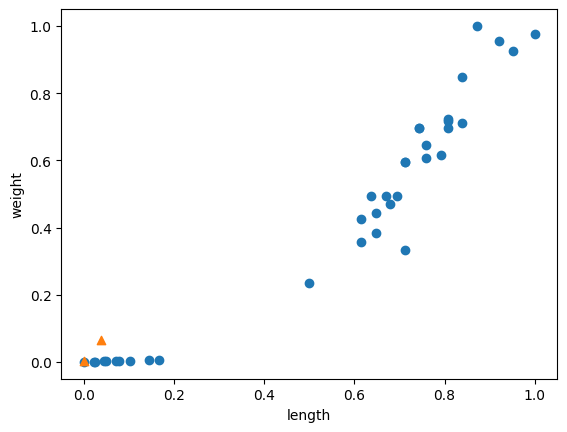

In [53]:
plt.scatter(train_normalized[:,0],train_normalized[:,1])
# plt.scatter(25,150,marker="^")
# plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.scatter(test_normalized[0],test_normalized[1],marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [54]:
knn.fit(train_normalized,train_target)


KNeighborsClassifier()

In [55]:
knn.score(train_normalized,train_target)

1.0

In [56]:
knn.score(test_normalized,test_target)

1.0

In [57]:
new2=([25,150]-min)/(max-min)
new2

array([0.48717949, 0.14158756])

In [58]:
knn.predict([new2])

array([1.])

In [59]:
distance, indexes=knn.kneighbors([new2])

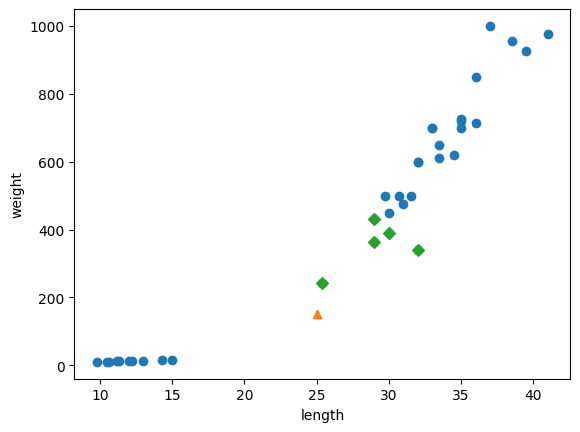

In [60]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [61]:
new3=([20,125]-min)/(max-min)

In [62]:
knn.predict([new3])

array([0.])

In [63]:
distance, indexes=knn.kneighbors([new3])

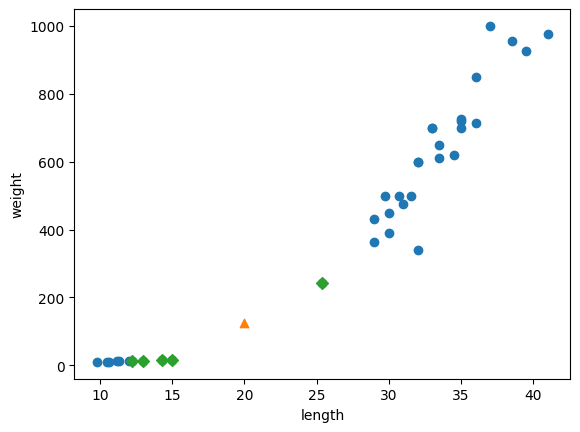

In [64]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(20,125,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 분류성과지표표

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score



In [66]:
y_test=[1]*5+[0]*5
y_test

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [67]:
y_pred=[1]*10
y_pred

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [68]:
## 정확도
acc=accuracy_score(y_test,y_pred)
acc

0.5

In [69]:
## preceision
precision=precision_score(y_test,y_pred)
precision


0.5

In [70]:
recall_score(y_test,y_pred)

1.0

In [71]:
f1_score(y_test,y_pred)

0.6666666666666666